# Experiment 1 analysis

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display
import os

In [2]:
df = pd.read_csv("E:/experiments_results/results_20250122_180102.csv")
kadid_mos = pd.read_csv("E:/datasets/kadid10k/dmos.csv")
agiqa_mos = pd.read_csv("E:/datasets/AGIQA_3K_MOS.csv")

In [3]:
df.columns

Index(['model', 'dataset', 'prompt', 'image_id', 'predicted_score'], dtype='object')

In [4]:
df.head()

,model,dataset,prompt,image_id,predicted_score
0,model2,KADID10K,prompt1,I01_03_04.png,ER: \nRate the quality of the image. ASSISTAN...
1,model2,KADID10K,prompt1,I02_02_05.png,ER: \nRate the quality of the image. ASSISTAN...
2,model2,KADID10K,prompt1,I02_10_01.png,ER: \nRate the quality of the image. ASSISTAN...
3,model2,KADID10K,prompt1,I02_16_05.png,ER: \nRate the quality of the image. ASSISTAN...
4,model2,KADID10K,prompt1,I02_17_02.png,ER: \nRate the quality of the image. ASSISTAN...


In [17]:
num = 5
kadid_images_folder_path = "E:/datasets/kadid10k/images/uniform"

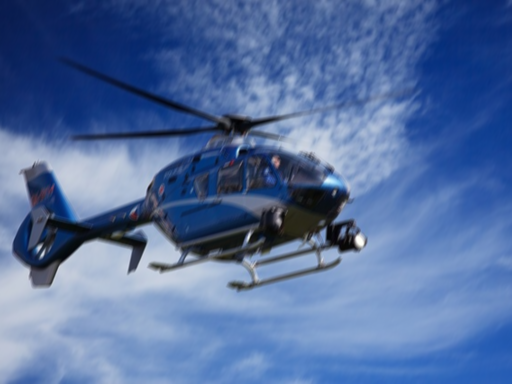

Image :I01_03_04.png
Score :ER:  
Rate the quality of the image. ASSISTANT: The image is of a helicopter flying in the sky, with a clear blue sky as the backdrop. The helicopter is the main focus of the scene, and it appears to be a large, blue and white aircraft. The sky is cloudless, and the helicopter is flying high, making it a beautiful sight. The image captures the essence of a clear day with a helicopter soaring through the air, creating a sense of freedom and adventure.
Ground Truth MOS: 2.03



In [7]:
for index in range(num):
    
    image_id = df.iloc[index]['image_id']
    score = df.iloc[index]['predicted_score']
    mos_value = kadid_mos[kadid_mos['dist_img'] == image_id]['dmos'].values
    # mos_value = agiqa_mos[agiqa_mos['name'] == image_id]['mos_quality'].values

    image_path = os.path.join(kadid_images_folder_path, image_id)

    try:
        img = Image.open(image_path)
        display(img)
        print(f"Image :{image_id}")
        print(f"Score :{score}")
        print(f"Ground Truth MOS: {mos_value[0]}\n")
    except FileNotFoundError:
        print(f"Could not find image: {image_path}\n")

    

## Comparison between LLaVA 1.6 and 1.5

In [22]:
# Analysing LLaVA 1.6 results
df_2 = pd.read_csv("E:/experiments_results/experiment_1_results_20250122_195841.csv")

In [33]:
df_2_test = df_2[(df_2['dataset'] == 'AGIQA3K') & (df_2['prompt'] == 'prompt1')].sample(10)
agiqa_images_folder_path = "E:/datasets/AGIQA-3K/uniform"

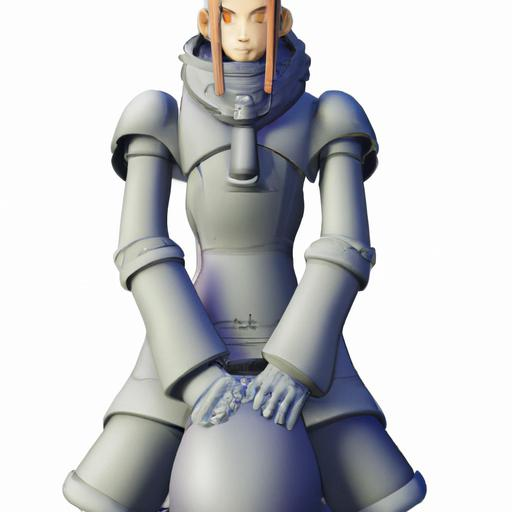

Image :DALLE2_normal_246.jpg
LLaVA 1.6 Score :USER: 
Rate the quality of the image. ASSISTANT: The image you've provided appears to be a 3D rendering or illustration of a character. The quality of the image is quite high, with a clear and detailed representation of the character's features. The textures and shading are well-executed, giving the character a lifelike appearance. The lighting and shadowing are also well-done, contributing to the overall realism of the image. The character's pose and the use of light and shadow create
Ground Truth MOS: 2.082442662



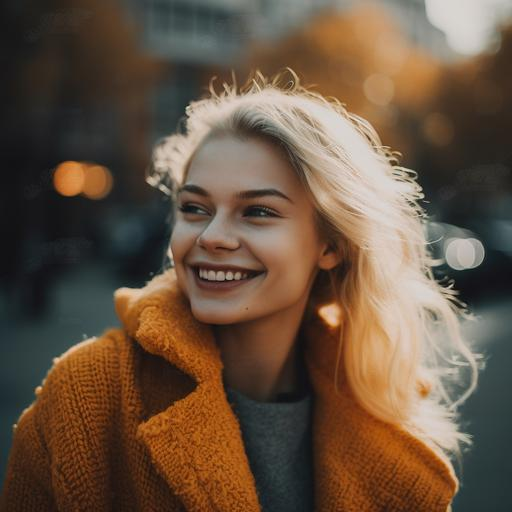

Image :midjourney_normal_130.jpg
LLaVA 1.6 Score :USER: 
Rate the quality of the image. ASSISTANT: The image you've provided appears to be of high quality. It's a well-composed photograph with good lighting that highlights the subject's features. The focus is sharp, and the colors are vibrant. The background is blurred, which helps to keep the attention on the subject. Overall, the image is well-executed and would likely be considered of good quality.
Ground Truth MOS: 4.050672118



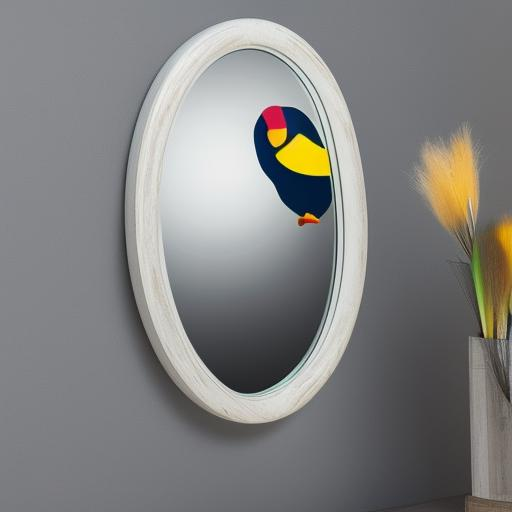

Image :sd1.5_normal_216.jpg
LLaVA 1.6 Score :USER: 
Rate the quality of the image. ASSISTANT: The image appears to be of high quality. It is a clear and well-lit photograph with good contrast and color saturation. The reflection in the mirror is sharp and well-defined, indicating that the image was taken with a camera that has a good autofocus system. The composition of the image is balanced, with the mirror centered and the vase and feathers to the right, creating a pleasing visual balance. Overall, the image is well-executed and presents
Ground Truth MOS: 2.326531297



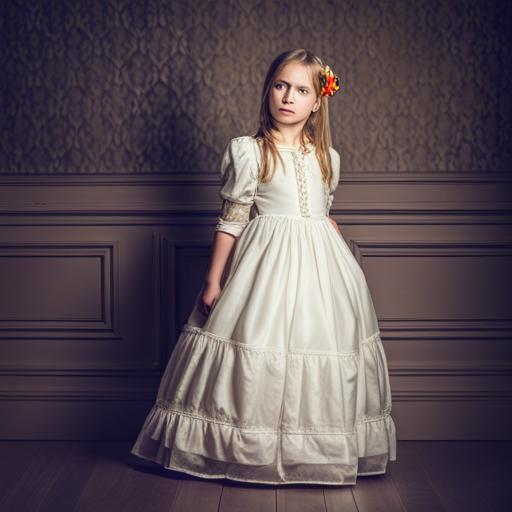

Image :xl2.2_normal_199.jpg
LLaVA 1.6 Score :USER: 
Rate the quality of the image. ASSISTANT: The image you've provided appears to be a high-quality photograph. It features a young girl dressed in a white dress with a ruffled hem, standing against a textured wall with a dark color. The lighting is soft and even, which is flattering to the subject. The focus is sharp, and the details are clear, especially on the textures of the dress and the wall. The composition is balanced, and the subject is centered, which is a common technique
Ground Truth MOS: 3.524162768



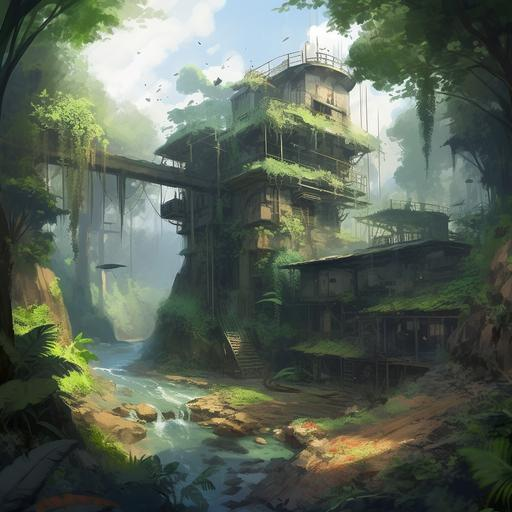

Image :midjourney_normal_065.jpg
LLaVA 1.6 Score :USER: 
Rate the quality of the image. ASSISTANT: The image you've provided is a beautiful piece of digital artwork. It features a fantastical structure nestled within a lush, verdant environment. The attention to detail in the foliage, the architectural elements, and the lighting is quite impressive. The color palette is rich and vibrant, contributing to the overall atmosphere of the scene. The artwork has a high level of realism, especially in the depiction of the vegetation and the
Ground Truth MOS: 4.488740784



In [34]:
for index in range(num):
    
    image_id = df_2_test.iloc[index]['image_id']
    # score_1_5 = df.iloc[index]['predicted_score']
    # score_1_6 = df_2_test.iloc[index]['predicted_score']
    # score_1_5 = df[df['image_id'] == image_id]['predicted_score'].values
    score_1_6 = df_2_test[df_2_test['image_id'] == image_id]['predicted_score'].values
    # mos_value = kadid_mos[kadid_mos['dist_img'] == image_id]['dmos'].values
    mos_value = agiqa_mos[agiqa_mos['name'] == image_id]['mos_quality'].values

    image_path = os.path.join(agiqa_images_folder_path, image_id)

    try:
        img = Image.open(image_path)
        display(img)
        print(f"Image :{image_id}")
        # print(f"LLaVA 1.5 Score :{score_1_5[0]}")
        print(f"LLaVA 1.6 Score :{score_1_6[0]}")
        print(f"Ground Truth MOS: {mos_value[0]}\n")
    except FileNotFoundError:
        print(f"Could not find image: {image_path}\n")

    

In [2]:
df = pd.read_csv("~/nr_iqa_masters_thesis/results/llava-v1.5-7b_results_20250203_164538.csv")

In [3]:
df.head()

,model_name,dataset,prompt,image_id,predicted_score
0,llava-v1.5-7b,KADID10K,prompt1_v1,I01_03_04.png,ER: \nRate the quality of the image. ASSISTAN...
1,llava-v1.5-7b,KADID10K,prompt1_v3,I01_03_04.png,-1
2,llava-v1.5-7b,KADID10K,prompt2_v1,I01_03_04.png,80.0
3,llava-v1.5-7b,KADID10K,prompt2_v2,I01_03_04.png,95.0
4,llava-v1.5-7b,KADID10K,prompt3_v1,I01_03_04.png,-1


In [4]:
for i in range(df.shape[0]):
    print(df.iloc[i]['predicted_score'])

ER:  
Rate the quality of the image. ASSISTANT: The image is of a helicopter flying in the sky, with a clear blue sky as the backdrop. The helicopter is the main focus of the scene, and it appears to be a large, blue and white aircraft. The sky is cloudless, and the helicopter is flying high, making it a beautiful sight. The image captures the essence of a clear day with a helicopter soaring through the air, creating a sense of freedom and adventure.
-1
80.0
95.0
-1
ER:  

                Use the image and the following scene graph as context and answer the following question: 

                Scene graph: {
"scene": "A helicopter flying in the sky",
"objects": [
{
"object": "Helicopter",
"attributes": {
"color": "Blue",
"type": "Helicopter"
},
"relationships": [
{
"relationship": "flying",
"direction": "up"
}
]
},
{
"object": "Clouds",
"attributes": {
"color": "Pink",
"type": "Clouds"
},
"relationships": [
{
"relationship": "in the sky",
"direction": "above"
}
]
}

                Ev